# Linear Regression

## Simple linear regression

### Dataset description and visualisation

<b>Student Hours & Scores: </b> In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

<div class="alert alert-block alert-danger"> 

1. Import the student hours and scores dataset.
2. Is this task a multiple or a simple linear regression problem?
3. Which variable represents the dependent variable, and which one represents the independent variable?
4. Display the number of samples and features in the dataset.
5. Display the information about the dataset features.
6. Describe the features by displaying their statistics.
7. Plot the data and observe whether it demonstrates linear separability.
<div/>

### Dataset training and evaluation

<div class="alert alert-block alert-danger">  
    
1. Split the dataset into training and testing sets.
2. Train the data using the LinearRegression module from sklearn. 
3. Display the model's equation.
4. Create a plot showing the data and the generated model.
5. Display the performance of the generated model on the training and the test set, based on the following metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared. Does the generated model present an overfitting problem?
6. Describe the R-squared metric and its advantages compared to the other metrics.
7. Is the generated model characterized by good performance?
8. Create a plot visualizing the difference between actual and predicted values.
<div/>

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
(25, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes
None


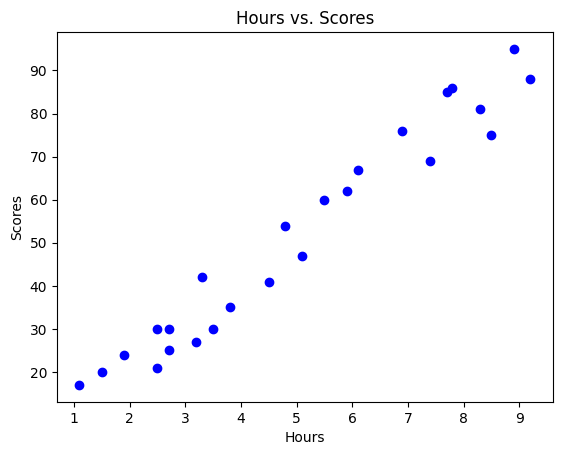

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv('data/student_scores.csv')
print(data.head())
print(data.shape)
print(data.info())



plt.scatter(data['Hours'], data['Scores'], color='blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours vs. Scores')
plt.show()


Model equation: y = 2.826892353899737 + 9.682078154455697 * x


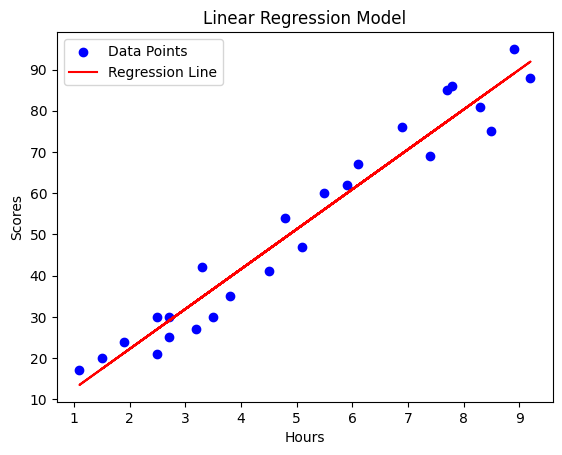

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = data[['Hours']]
y = data['Scores']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

intercept = model.intercept_
slope = model.coef_[0]

print(f"Model equation: y = {intercept} + {slope} * x")

plt.scatter(X, y, color='blue', label='Data Points')

plt.plot(X, model.predict(X), color='red', label='Regression Line')

plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Linear Regression Model')
plt.legend()

plt.show()

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("Performance sur l'ensemble d'entraînement :")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R-squared: {r2_train}")

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nPerformance sur l'ensemble de test :")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R-squared: {r2_test}")


Performance sur l'ensemble d'entraînement :
MAE: 5.221357478352559
MSE: 31.454835527366846
RMSE: 5.608461065868858
R-squared: 0.9491209376364416

Performance sur l'ensemble de test :
MAE: 3.9207511902099244
MSE: 18.943211722315272
RMSE: 4.352380006653288
R-squared: 0.9678055545167994


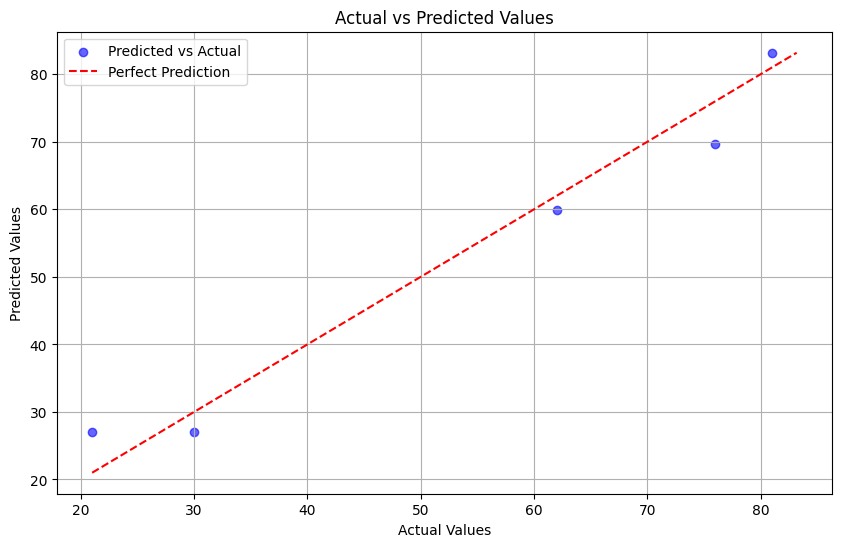

In [4]:
import matplotlib.pyplot as plt
import numpy as np

actual_values = y_test  
predicted_values = y_test_pred  

plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, color='blue', label='Predicted vs Actual', alpha=0.6)


min_value = min(min(actual_values), min(predicted_values))
max_value = max(max(actual_values), max(predicted_values))
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--', label='Perfect Prediction')


plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()

plt.show()
